In [1]:
!pip install transformers[torch] -q
!pip install umap-learn numpy matplotlib -q

In [2]:
import warnings
# To ignore all warnings (not recommended unless you're sure about the consequences)
warnings.filterwarnings("ignore")

In [3]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [5]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-BERT') 
model1

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [6]:
model1.bert

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [7]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-BERT')
tokenizer1

BertTokenizerFast(name_or_path='sampathlonka/San-BERT', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [8]:
# Initialize empty lists to store data
folder_names = []
texts=[]

In [9]:
folder_path = '/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa'

# List all files in the folder
for folder_name in os.listdir(folder_path):
    folder_dir = os.path.join(folder_path, folder_name)
    print(folder_dir)
    df = pd.read_excel(folder_dir)
    # Iterate through each row and store it as a list
    for index, row in df.iterrows():
        t = row.tolist()
        texts.append(t)
        folder_names.append(folder_name[:-5])
df = pd.DataFrame({'Text': texts, 'FolderName': folder_names})

'''#folder_dir = os.path.join(folder_path, folder_name)
    print(folder_name)
    excel_path = os.path.join(folder_path, file_name)
    # Read Excel file and extract text
    excel_data = pd.read_excel(excel_path)
    text = ' '.join(str(cell) for cell in excel_data.values.flatten())
    text_data.append(text)
    folder_names.append(folder_name[:-5])'''

# Create a DataFrame
#df = pd.DataFrame({'Text': text_data, 'FolderName': folder_names})

/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_04.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_19.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_07.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_08.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_11.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_02.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_01.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_13.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_12.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_09.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_06.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_17.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_14.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/ragh

"#folder_dir = os.path.join(folder_path, folder_name)\n    print(folder_name)\n    excel_path = os.path.join(folder_path, file_name)\n    # Read Excel file and extract text\n    excel_data = pd.read_excel(excel_path)\n    text = ' '.join(str(cell) for cell in excel_data.values.flatten())\n    text_data.append(text)\n    folder_names.append(folder_name[:-5])"

In [10]:
#texts
len(texts)

1647

In [11]:
df.Text[500]

['\n\n\t\tमन्दः कवियशः प्रार्थी गमिष्याम्यपहास्यताम्।\n\t\tप्रांशुलभ्ये फले लोभादुद्बाहुरिव वामनः॥ १-३\n']

In [12]:
df.FolderName[500]

'raghuvamsha_sarga_01'

In [13]:
import re

In [14]:
# Define custom functions to process text within a list
def process_text(text_list):
    processed_text_list = []
    for text in text_list:
        # Remove newline characters '\n' and tab characters '\t'
        cleaned_text = text.replace('\n', '')
        cleaned_text = text.replace('\t', '')
        cleaned_text = text.replace('।', '')
        cleaned_text = text.replace('९', '')
        cleaned_text = text.replace('८', '')
        cleaned_text = text.replace('o)0(o', '')
        cleaned_text = text.replace('॥', '')
        cleaned_text = text.replace('२', '')
        cleaned_text = text.replace('९', '')
        cleaned_text = text.replace('२', '')
        cleaned_text = text.replace('३', '')
        cleaned_text = text.replace('४', '')
        cleaned_text = re.sub('[॥.*?॥]|[॥]', '', cleaned_text) # replaces ॥ text ॥ or॥ by a ।
        cleaned_text = re.sub('।','',cleaned_text)
        cleaned_text = re.sub('९','',cleaned_text)
        cleaned_text = re.sub('२','',cleaned_text)
        cleaned_text = re.sub('८','',cleaned_text)
        cleaned_text = re.sub('\xa0','',cleaned_text)
        cleaned_text = re.sub('o','',cleaned_text)
        cleaned_text = re.sub('0','',cleaned_text)
        cleaned_text = re.sub('[(]','',cleaned_text)
        cleaned_text = re.sub('[)]','',cleaned_text)
        # Split by '||' and keep only the part before it
        cleaned_text = cleaned_text.split('||')[0].strip()
        processed_text_list.append(cleaned_text)
    return processed_text_list

# Apply the custom function to each row of the 'Text' column
df['Text'] = df['Text'].apply(process_text)

# Display the modified DataFrame
print(df)

                                                   Text            FolderName
0     [स राज्यं गुरुणा दत्तं प्रतिपद्याधिकं बभौ|\nदि...  raghuvamsha_sarga_04
1     [दिलीपानन्तरं राज्ये तं निशम्य प्रतिष्ठितम्|\n...  raghuvamsha_sarga_04
2     [पुरुहूतध्वजस्येव तस्योन्नयनपङ्क्तयः|\nनवाभ्यु...  raghuvamsha_sarga_04
3     [सममेव समाक्रान्तं द्वयं द्विरदगामिना|\nतेन सि...  raghuvamsha_sarga_04
4     [छायामण्डललक्ष्येण तमदृश्या किल स्वयम्|\nपद्मा...  raghuvamsha_sarga_04
...                                                 ...                   ...
1642            [अथ स विषयव्यावृत्तात्मा यथाविधि सूनवे]  raghuvamsha_sarga_03
1643  [नृपतिककुदं दत्त्वा यूने सितातपवारणम्|\nमुनिवन...  raghuvamsha_sarga_03
1644       [गलितवयसामिक्ष्वाकूणामिदं हि कुलव्रतम् ३-७०]  raghuvamsha_sarga_03
1645    [इति कालिदास कृत रघुवंश महाकाव्ये तृतीयः सर्गः]  raghuvamsha_sarga_03
1646                                            [-----]  raghuvamsha_sarga_03

[1647 rows x 2 columns]


In [15]:
for i in range(len(df)):
    print(df.Text[i])

['स राज्यं गुरुणा दत्तं प्रतिपद्याधिकं बभौ|\nदिनान्ते निहितं तेजः सवित्रेव हुताशनः -१']
['दिलीपानन्तरं राज्ये तं निशम्य प्रतिष्ठितम्|\nपूर्वं प्रधूमितो राज्ञां हृदयेऽग्निरिवोत्थितः -']
['पुरुहूतध्वजस्येव तस्योन्नयनपङ्क्तयः|\nनवाभ्युत्थानदर्शिन्यो ननन्दुः सप्रजाः प्रजाः -३|']
['सममेव समाक्रान्तं द्वयं द्विरदगामिना|\nतेन सिंहासनं पित्र्यमखिलं चारिमण्डलम् -']
['छायामण्डललक्ष्येण तमदृश्या किल स्वयम्|\nपद्मा पद्मातपत्रेण भेजे साम्राज्यदीक्षितम् -५']
['परिकल्पितसांनिध्या काले काले च बन्दिषु|\nस्तुत्यं स्तुतिभिरर्थ्याभिरुपतस्थे सरस्वती -६']
['मनुप्रभुतिर्मान्यैर्भुक्ता यद्यपि राजभिः|\nतथाप्यनन्यपूर्वेव तस्मिन्नासीद्वसुंधरा -७']
['स हि सर्वस्य लोकस्य युक्तदण्डतया मनः|\nआददे नातिशीतोष्णो नभस्वानिव दक्षिणः -']
['मन्दोत्कण्ठाः कृतास्तेन गुणाधिकतया गुरौ|\nफलेन सहकारस्य पुष्पोद्गम इव प्रजाः -']
['नयविद्भिर्नवे राज्ञि सदसच्चोपदर्शितम्|\nपूर्व एवाभवत्पक्षस्तस्मिन्नाभवदुत्तरः -१०']
['पञ्चानामपि भूतानामुत्कर्षं पुपुषुर्गुणाः|\nनवे तस्मिन्महीपाले सर्वं नवमिवाभवत् -११']
['यथा प्रह्लादनाच्चन्द्रः प्रतापात

In [16]:
df.to_csv('cleaned.csv')

In [17]:
embedding=[]

In [18]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.bert(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [19]:
embedding[500].shape

(768,)

In [20]:
data= np.array(embedding)
data

array([[-0.9627137 , -1.3908619 , -0.5929447 , ...,  0.02827175,
        -0.81964195, -0.3585162 ],
       [-0.9627134 , -1.3908619 , -0.5929443 , ...,  0.02827215,
        -0.8196424 , -0.3585156 ],
       [-0.9627135 , -1.3908614 , -0.5929443 , ...,  0.02827197,
        -0.81964225, -0.35851604],
       ...,
       [-0.9627133 , -1.3908617 , -0.5929453 , ...,  0.02827236,
        -0.81964225, -0.35851634],
       [-0.962713  , -1.3908591 , -0.59294355, ...,  0.02827206,
        -0.81964284, -0.35851574],
       [-0.96271384, -1.3908621 , -0.59294635, ...,  0.02827164,
        -0.81964433, -0.3585153 ]], dtype=float32)

In [21]:
data.shape

(1647, 768)

## t-SNE Visualization

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

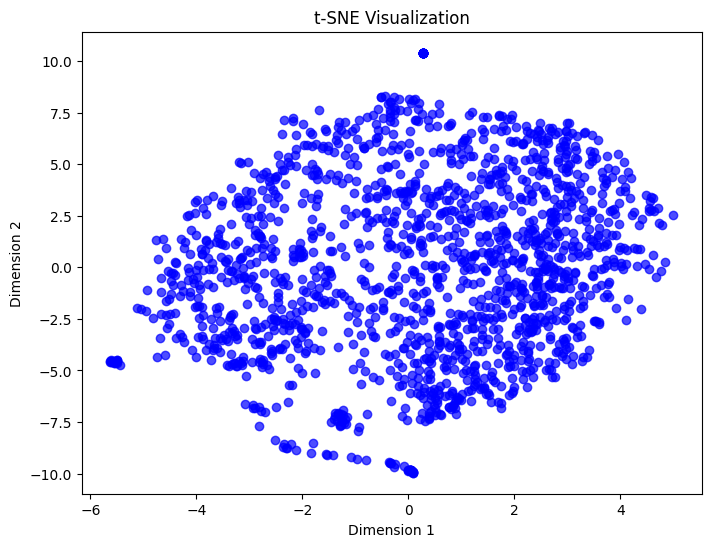

In [23]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

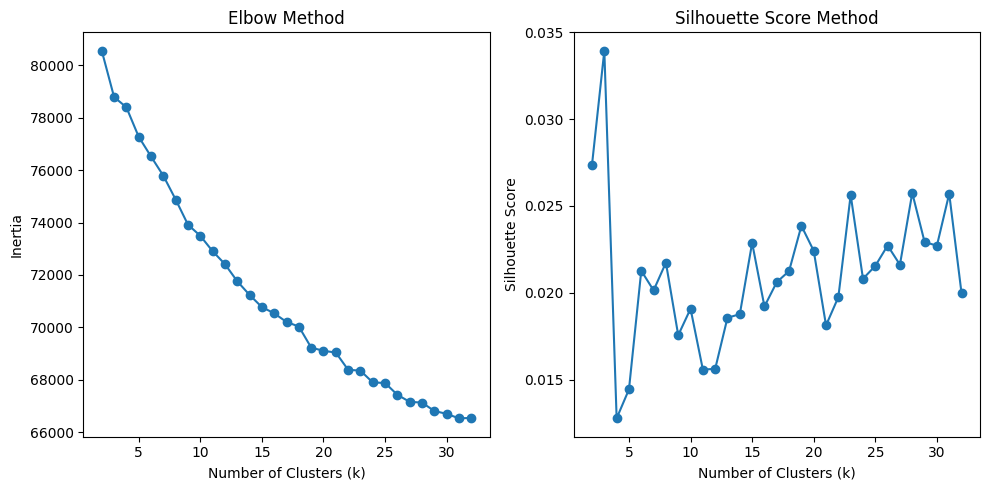

Silhouette Score for 3 clusters: 0.033942967653274536


In [24]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate random data for demonstration (replace with your data)
np.random.seed(0)
#data = np.random.rand(95, 768)

# Step 1: Dimensionality Reduction (PCA)
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

# Step 2: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Step 3: Choosing the Number of Clusters (k)
k_values = range(2, 33)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Method to choose k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

# Based on the plots, choose an appropriate value of k

# Step 4: K-means clustering with chosen k
chosen_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
kmeans.fit(data_scaled)

# Step 5: Evaluate the Results (Silhouette Score)
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score for {chosen_k} clusters: {silhouette_avg}")

# Step 6: Interpretation
# Since this is a high-dimensional space, visualization is challenging.
# You may explore dimensionality-reduced visualizations like scatter plots using PCA components.

# Step 7: Alternative Algorithms
# You can try alternative clustering algorithms like DBSCAN or hierarchical clustering.

# Step 8: Computational Resources
# Be aware that high-dimensional k-means can be computationally expensive.

# Step 9: Feature Selection
# If needed, consider feature selection techniques to choose informative features.

# Further analysis and visualization can be performed based on your specific needs.


In [25]:
#data_pca[0]
#data_scaled[0]
k_values

range(2, 33)